In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors

# VEGF2

In [78]:
df_VEGF = pd.read_csv('VEGF2.csv') #pIC50
df_VEGF = df_VEGF.drop(['tid', 'standard_type', 'confidence_score', 'cmpd_pref_name', 'activity_comment'], axis=1)
df_VEGF.head()

,cmpd_chembl_id,canonical_smiles,value
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105


In [79]:
#m = Chem.MolFromSmiles(df_VEGF['canonical_smiles'][0])
mols = [Chem.MolFromSmiles(i) for i in df_VEGF['canonical_smiles']]
df_VEGF['molFromSmiles'] = mols
df_VEGF.head()

,cmpd_chembl_id,canonical_smiles,value,molFromSmiles
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...


In [80]:
#df_VEGF[['cmpd_chembl_id','molFromSmiles','value']]

In [81]:
df_VEGF.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cmpd_chembl_id    6715 non-null   object 
 1   canonical_smiles  6715 non-null   object 
 2   value             6715 non-null   float64
 3   molFromSmiles     6715 non-null   object 
dtypes: float64(1), object(3)
memory usage: 210.0+ KB


In [73]:
#dir(Descriptors)
#Descriptors.MolLogP(df_VEGF['molFromSmiles'][0])
MolWt = [Descriptors.MolWt(i) for i in df_VEGF['molFromSmiles']]
MolLogP = [Descriptors.MolLogP(i) for i in df_VEGF['molFromSmiles']]
NumHAcceptors = [Descriptors.NumHAcceptors(i) for i in df_VEGF['molFromSmiles']]
NumHDonors = [Descriptors.NumHDonors(i) for i in df_VEGF['molFromSmiles']]

In [92]:
df_VEGF['MolWt'] = df_VEGF['molFromSmiles'].apply(Descriptors.MolWt)
df_VEGF['MolLogP'] = df_VEGF['molFromSmiles'].apply(Descriptors.MolLogP)
df_VEGF['NumHAcceptors'] = df_VEGF['molFromSmiles'].apply(Descriptors.NumHAcceptors)
df_VEGF['NumHDonors'] = df_VEGF['molFromSmiles'].apply(Descriptors.NumHDonors)

In [93]:
df_VEGF.head()

,cmpd_chembl_id,canonical_smiles,value,molFromSmiles,MolWt,MolLogP,NumHAcceptors,NumHDonors
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...,440.543,4.9181,4,2
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...,434.496,4.2293,8,1
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...,371.444,5.0185,3,4
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...,438.531,4.3103,6,0
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105,<rdkit.Chem.rdchem.Mol object at 0x000001DCC39...,431.378,4.1194,9,2


<AxesSubplot:xlabel='MolWt', ylabel='Count'>

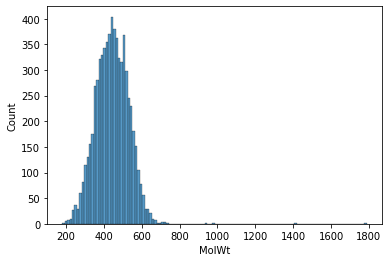

In [95]:
sns.histplot(df_VEGF.MolWt)
#Struktura by neměla mít větší molární hmotnost než 500 g/mol.

<AxesSubplot:xlabel='MolLogP', ylabel='Count'>

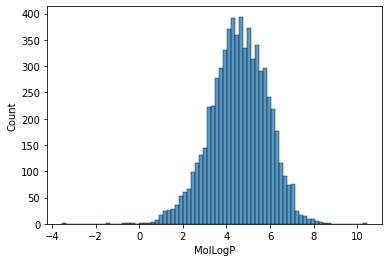

In [96]:
sns.histplot(df_VEGF.MolLogP)
#Struktura by měla mít log P menší než 5

<AxesSubplot:xlabel='NumHAcceptors', ylabel='Count'>

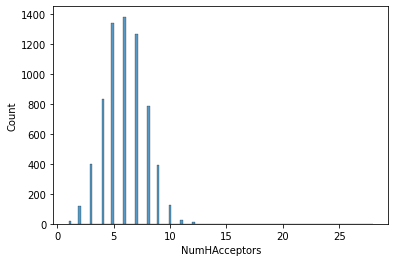

In [97]:
sns.histplot(df_VEGF.NumHAcceptors)
#Struktura by měla obsahovat maximálně 10 akceptorů vodíkových vazeb.

<AxesSubplot:xlabel='NumHDonors', ylabel='Count'>

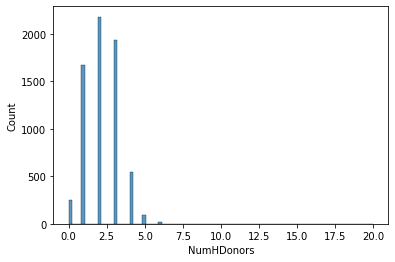

In [98]:
sns.histplot(df_VEGF.NumHDonors)
#Struktura by měla obsahovat maximálně 5 donorů vodíkových vazeb.

array([[<AxesSubplot:title={'center':'NumHDonors'}>,
        <AxesSubplot:title={'center':'NumHAcceptors'}>],
       [<AxesSubplot:title={'center':'MolLogP'}>,
        <AxesSubplot:title={'center':'MolWt'}>]], dtype=object)

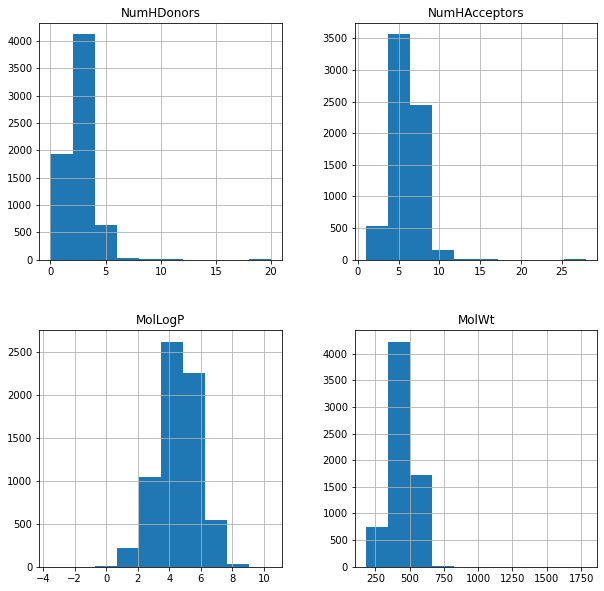

In [105]:
df_VEGF[["NumHDonors","NumHAcceptors","MolLogP","MolWt"]].hist(figsize=(10,10))

In [ ]:
df_VEGF["lipin"]=0

In [146]:
def lipin(NumHD, NumHA, MolLogP, MolWt):
    s = sum([NumHD<=5, NumHA<=10, MolLogP<=5, MolWt<=500])
    return s>2

In [155]:
df_VEGF['lipin'] = [lipin(*r) for i,r in df_VEGF[["NumHDonors","NumHAcceptors","MolLogP","MolWt"]].iterrows()]

In [149]:
lipin(d.iloc[0][0],d.iloc[0][1],d.iloc[0][1],d.iloc[0][1])

True

In [158]:
df_VEGF['lipin'] 

0       True
1       True
2       True
3       True
4       True
        ... 
6710    True
6711    True
6712    True
6713    True
6714    True
Name: lipin, Length: 6715, dtype: bool

In [160]:
df_VEGF['lipin'].value_counts()

True     5510
False    1205
Name: lipin, dtype: int64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='lipin', ylabel='Count'>

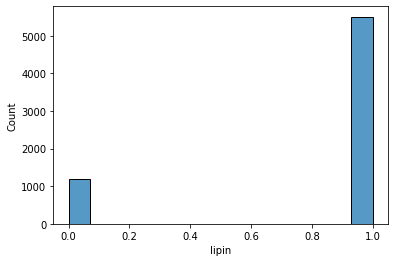

In [157]:
sns.histplot(df_VEGF.lipin)

# CB2

In [82]:
df_CB2 = pd.read_csv('CB2.csv',delimiter=";")
df_CB2 = df_CB2.drop(['Standard Relation','Properties','Document Year','Document Journal','Assay Variant Accession',
                      'Source Description','Assay Variant Mutation','Data Validity Comment','Assay Parameters',
                     'Molecule Name','Comment','Ligand Efficiency BEI','Ligand Efficiency LE','Ligand Efficiency LLE',
                     'Ligand Efficiency SEI','Assay Subcellular Fraction','Assay Tissue Name','Assay Tissue ChEMBL ID',
                     'Target Type','BAO Format ID','BAO Label','Molecule Max Phase','#RO5 Violations','Assay Organism',
                     'Standard Value','Standard Units','pChEMBL Value','Uo Units','Assay Cell Type','Assay Type',
                     'Target Organism','Standard Type','Target ChEMBL ID','Target Name','Cell ChEMBL ID','Source ID',
                     'Potential Duplicate','Compound Key','AlogP','Document ChEMBL ID','Assay Description'], axis=1)
df_CB2.head()

,Molecule ChEMBL ID,Molecular Weight,Smiles,Assay ChEMBL ID
0,CHEMBL466823,358.87,Cc1cnc(NC(=O)C(C)(C)S(=O)(=O)c2ccc(Cl)cc2)s1,CHEMBL1021556
1,CHEMBL454813,351.86,CC(C)(C(=O)NCc1ccccc1)S(=O)(=O)c1ccc(Cl)cc1,CHEMBL1021556
2,CHEMBL511233,388.88,CC(C)(C(=O)Nc1cnc2ccccc2c1)S(=O)(=O)c1ccc(Cl)cc1,CHEMBL1021557
3,CHEMBL512591,422.43,CC(C)(C(=O)Nc1cnc2ccccc2c1)S(=O)(=O)c1ccc(C(F)...,CHEMBL1021560
4,CHEMBL511233,388.88,CC(C)(C(=O)Nc1cnc2ccccc2c1)S(=O)(=O)c1ccc(Cl)cc1,CHEMBL1021560


In [87]:
m = [Chem.MolFromSmiles(i) for i in df_CB2['Smiles']]

TypeError: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type float

In [ ]:
df_CB2['mol'] = m
df_CB2.head()

In [88]:
df_CB2['Smiles'] = df_CB2['molFromSmiles'].apply(Descriptors.MolWt)